## Housekeeping
If you have not done so, you have to install the libraries
* numpy
* pandas
* matplotlib

# [Numpy](https://numpy.org/)
(Numerical Python)

[Numpy](https://numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. It lays at the foundation of an entire ecosystem of libraries to deal with (numerical) data in Python, some of which will be covered later in this lecture and in this course.

A [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) is
* a grid of values,
* all of the same type,
* and is indexed by a tuple of nonnegative integers.

Numpy arrays can have any number of dimenions
* 1-dimensional (think of vectors)
* 2-dimensional (think of matrices)
* $n$-dimensional (hard to imagine and rarely used but mathematically possible)

Numpy also provides many functions to work with these arrays (e.g. do math with them). These functions are usually by far the fastest way to work with numbers in Python (_much_ faster than writing your own for loop)!

In [1]:
# import Library
import numpy as np  # np is the conventially used shorthand for numpy

## One Dimensional Arrays

In [6]:
a = np.array([1, 2, 3, 4])

In [7]:
a

array([1, 2, 3, 4])

In [8]:
type(a)  # note: It's not just a list or tuple

numpy.ndarray

The [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html) property of an ndarray object tells you
* the numer of dimensions (given through the number of elements)
* the number of entries per dimension

In [9]:
a.shape

(4,)

In [10]:
a[2]  # remember, that indices are 0-based, so index 2 is the third entry in the vector

3

In [11]:
# We can also overwrite individual elements
a[1] = 10
a

array([ 1, 10,  3,  4])

### Simple Math on Array Elements
If you consider an array as a collection of numbers, it is easy to calculate let's say the sum or mean of the numbers.

While you probably could do most of this also using for loops, this is _much_ faster!

In [12]:
x = np.array([1, 2, 3, 4, 5, 6])
print(f'Sum of elements is {x.sum()}, the mean of elements is {x.mean()}, standard deviation of elements is {x.std()}')

Sum of elements is 21, the mean of elements is 3.5, standard deviation of elements is 1.707825127659933


## Two-Dimensional Numpy Arrays

In [13]:
# Create a rank 2 array (line breaks are optional, but help to visualize the structure of the resulting object)
b = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [14]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
b.shape

(2, 3)

In [16]:
b[1, 2]  # following mathematical convention, first index specifies the row, second index the column

6

### Example: Create the following rank 2 array with shape $3\times 4$
$$
    \begin{pmatrix}
        1 & 2 & 3 & 4 \\
        5 & 6 & 7 & 8 \\
        9 & 10 & 11 & 12
    \end{pmatrix}
$$

In [17]:
my_array_2d = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

In [18]:
my_array_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [19]:
my_array_2d.shape

(3, 4)

## Slicing of Numpy Arrays
[Slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing) provides means to address/extract/overwrite more than a single element from an array at a time.

For every dimension, you may specify:
* A single index (as before, negative values count from the end)
* A range of indices (using the `start:end` or `start:end:interval` notation)
* All elements along the dimension (using `:`)

In [24]:
my_array_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [27]:
# only the first column
print(f'first column {my_array_2d[:, 1]}')


first column [ 2  6 10]


In [ ]:
# only the first column
print(f'first column {my_array_2d[:, 0]}')

print(f'last row {my_array_2d[-1, :]}')
print(f'last column {my_array_2d[:, -1]}')

### Example:
Use slicing to pull out the subarray consisting of the first 2 rows and columns 1 and 2. The result should be

$$
\begin{pmatrix}
2 & 3\\
6 & 7
\end{pmatrix}
$$

In [28]:
my_array_2d[0:2, 1:3]

array([[2, 3],
       [6, 7]])

**Important**: A slice of an array is a _view_ into the same data, so modifying it will modify the original array.

In [30]:
my_array_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [37]:
my_slice = my_array_2d[-1, :]

In [38]:
my_slice

array([ 9, 10, 11, 12])

### Simple math on Elements of two (or more) dimensional arrays
We can still take the sum/average/... of elements in two or more dimensional arrays, but we need to specify the dimension(s) along which we want to aggregate.

In [40]:
b = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [41]:
b.sum(axis=0)  # take axis along first dimension (columns)

array([5, 7, 9])

In [42]:
b.sum(axis=1)  # take axis along second dimension (rows)

array([ 6, 15])

## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides [a large set](https://numpy.org/doc/stable/user/basics.types.html) of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array.

While you can store non-numeric data in numpy arrays, this is not what they are really meant for!

In [43]:
x = np.array([1, 2])

In [44]:
x.dtype

dtype('int32')

In [45]:
x = np.array([1.5, 2.5, 3.5])

In [46]:
x.dtype

dtype('float64')

You can also specify the datatype

In [47]:
x = np.array([1, 2], dtype=np.int64)

In [48]:
x.dtype

dtype('int64')

or change the datatype

In [49]:
x.astype(np.float64)  # note that the entries are now floats

array([1., 2.])

## Elementwise Operations on Numpy Arrays
Numpy allows us to do algebraic operations on arrays.

In [50]:
x = np.array([
    [1, 2],
    [3, 4]
])

In [51]:
y = np.array([
    [5, 6],
    [7, 8]
])

In [52]:
x + y  # Normal sum operation (element-wise summation)

array([[ 6,  8],
       [10, 12]])

In [ ]:
np.add(x, y) #alternatively we can again use Numpy to do the sum operation:

In [ ]:
y - x  # element-wise difference

In [ ]:
np.subtract(y, x)

In [53]:
x * y  # this is the ELEMENTWISE Multiplication of two matrices

array([[ 5, 12],
       [21, 32]])

In [ ]:
np.multiply(x,y)

In [ ]:
x / y

In [ ]:
np.divide(x,y)

In [ ]:
np.sqrt(y)

## Binary Masks
You can also select entries by passing a boolean array of the same shape.

Assume, we want to get all odd numbers from an array:

In [57]:
x = np.array([1, 2, 3])
x[[True, False, True]]  # only get first and third element

array([1, 3])

This is particularly powerful in conjunction with element-wise operations and comparisons. Note that the following expression returns not a single boolean value, but a boolean array:

In [59]:
x % 2 == 1

array([ True, False,  True])

So to get all odd entries from an array, we can mask it like:

In [60]:
x[x % 2 == 1]

array([1, 3])

In [62]:
x[x > 1]

array([2, 3])

## Matrix Multiplication (Dot-Product)
Elementwise multiplication of matrices is not what you might expect when multiplying two matrices. ["Proper Matrix Multiplication"](https://en.wikipedia.org/wiki/Matrix_multiplication) (applying the [dot product](https://en.wikipedia.org/wiki/Dot_product)) is available using [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot)

![Matrix Multiplication, figure from wikipedia.org (User:bilou)](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/546px-Matrix_multiplication_diagram_2.svg.png)

In [ ]:
x = np.array([
    [1, 2],
    [3, 4]
])
y = np.array([
    [5, 6],
    [7, 8]
])

In [ ]:
np.dot(x, y)

In [ ]:
# The top left element of the result of the matrix multiplication...
matrix_multiplication = np.dot(x, y)[0, 0]
# is the dot product of the first row of x and the first column of y
dot_product = np.dot(x[0,:], y[:,0])
print(matrix_multiplication, dot_product)

Numpy's dot function also enables to multiply matrices (2d arrays) with vectors (1d arrays) (equivalent of calculating $A\cdot \vec{x}$:
$$
    \begin{pmatrix}
        a_{1,1} & a_{1,2} & a_{1,3} \\
        a_{2,1} & a_{2,2} & a_{2,3}
    \end{pmatrix} \cdot
    \left(\begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array}\right)
    = 
    \left(\begin{array}{c} a_{1,1}\cdot x_1 a_{1,2}\cdot x_2 + a_{1,3}\cdot x_3 \\ a_{2,1}\cdot x_1 a_{2,2}\cdot x_2 + a_{2,3}\cdot x_3 \end{array}\right)
$$

In [ ]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
x = np.array([1, 2, 3])
np.dot(A, x)

## [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) in Numpy
So far, we have only added, multiplied, ... arrays that were in right format (e.g. had the same shape for elementwise operations). However, numpy can also do the following:

In [63]:
x = np.array([1, 2, 3])

In [66]:
x * 5  # one can also subtract/multiply with/divide by/take modulo w.r.t./... scalar

array([ 5, 10, 15])

In [ ]:
x % 3

Under the hood, numpy realizes that the two objects, while not of compatible shape, can be brought into compatible shape by "stretching" the scalar as in this picture from the numpy documentation:

![Broadcasting rules in Numpy](https://numpy.org/doc/stable/_images/theory.broadcast_1.gif)

The [Numpy documentation](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy) states:
> In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.

Scalars in this context are treated as $1\times 1$ matrices.

A more surprising example below, where we start with an array of shape $2 \times 3$:

In [ ]:
small_matrix = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
small_matrix + np.array([1, 2, 3])  # the last dimension of the small_matrix equals the only dimension of the second array

Under the hood, the array $\left( 1, 2, 3\right)$ is broadcasted into $\begin{pmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \end{pmatrix}$, so it has the same shape ($2 \times 3$) as `small_matrix` and thus, elementwise operations can take place.

The following also works: The second array is of shape $2 \times 1$. So...
* the first dimenion matches (2 for both objectts) and
* for the second dimension, the element with only one entry is "stretched".

In [ ]:
small_matrix + np.array([
    [1],
    [2]
])

# [Pandas](https://pandas.pydata.org/)

## DataFrames in Python

Pandas [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) are the go-to tool in the python ecosystem to work _tabular_, such as
* reading (e.g. from Excel, CSV, Databases, Big Data Platforms)
* manipulating
* filtering
* transforming
* storing (e.g. to Excel, CSV, Databases, Big Data Platforms)

this data.

_Tabular_ means that DataFrames always look like an Excel Spreadsheets, i.e. they have rows and columns.

| _index_ | Name of City | Inhabitants |
| --- | --- | --- |
| 0 | Cologne | 1083498 |
| 1 | Düsseldorf | 620523 |

As compared with Numpy arrays, DataFrames
* Always have 2 dimensions
* Can have different data types in different columns
* Can have indices that are not integers (similar to dictionaries)

Pandas is a popular Python package for data science, it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. This means that a data frame’s rows do not need to contain, but can contain, the same type of values: they can be numeric, character, logical, etc.

Besides that, pandas also offers the [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) class, which is one dimensional (has only one index plus an axes label). An example of a Series object is one column from a DataFrame.

In [67]:
#import the library
import pandas as pd  # again, pd is the commonly used shorthand for pandas

## Creating DataFrames
To create a DataFrame, we need to provide
* the data
* the `index` values (by which we can access rows) (By default, positive integers are used)
* the names of the `columns` (by which we can access columns) (By default, positive integers are used)

However: Pandas is smart and supports a variety of formats to define your data.

In [68]:
# defining a Numpy array 
my_2darray = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [69]:
pd.DataFrame(my_2darray) # Converting it to a Data frame, not specifying index or columns

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [70]:
# Specifying the index as well names
pd.DataFrame(
    my_2darray,  # the data, as before
    index=[10, 20, 30],
    columns=['a', 'b', 'c']
)

,a,b,c
10,1,2,3
20,4,5,6
30,7,8,9


### (Some) Alternative ways to construct DataFrames
Alternatively, we could for example:

In [71]:
# Create a DataFrame from a Dictionary with lists as values (keys are interpreted as column names)
pd.DataFrame(
    {  # same data as before
        'a': [1, 4, 7],  # values in column a
        'b': [2, 5, 8],
        'c': [3, 6, 9]
    },  
    index=[10, 20, 30],
    # we do not need to specify the columns now, as the dictionary defined them
)

,a,b,c
10,1,2,3
20,4,5,6
30,7,8,9


In [72]:
# Create a DataFrame from a list of dictionaries (where every dictionary defines one row/observation).
pd.DataFrame(
    [  # same data as before
        {'a': 1, 'b': 2, 'c': 3},  # values in first row
        {'a': 4, 'b': 5, 'c': 6},
        {'a': 7, 'b': 8, 'c': 9},
    ],  
    index=[10, 20, 30],
    # we do not need to specify the columns now, as the dictionaries defined them
)

,a,b,c
10,1,2,3
20,4,5,6
30,7,8,9


### Reading DataFrames from sources
Pandas offers a [wide range](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io) of supported in- and output formats. In this example, we will simply read in a CSV file:

In [73]:
nrw_cities = pd.read_csv(
    'data/nrw_cities.csv',  # filename
    sep=';'  # field separator
)

## Exploring a new DataFrame

In [74]:
nrw_cities.shape  # as with numpy arrays (first entry is number of rows, second entry is number of columns)

(10, 4)

In [75]:
len(nrw_cities)  # lengths is the number of rows

10

In [76]:
nrw_cities.head(2)  # print first 2 rows, use .tail() to print the last rows

,name,inhabitants,population_density,UNLOCODE
0,Düsseldorf,620523,2900,DEDUS
1,Münster,316403,1000,DEMSR


In [77]:
nrw_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                10 non-null     object
 1   inhabitants         10 non-null     int64 
 2   population_density  10 non-null     int64 
 3   UNLOCODE            10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [78]:
nrw_cities.describe()  # statistical properties, only available for numeric columns

,inhabitants,population_density
count,1.000000e+01,10.000000
mean,5.069966e+05,2183.500000
std,2.353563e+05,620.681749
min,3.164030e+05,1000.000000
25%,3.388828e+05,2097.500000
50%,4.301695e+05,2236.500000
75%,5.863758e+05,2650.500000
max,1.083498e+06,2900.000000


## Viewing (and changing) the Index
Index labels are currently still integers and not particularly helpful. Let's use the UNLOCODEs (which are unique) as indices:

In [79]:
nrw_cities.columns

Index(['name', 'inhabitants', 'population_density', 'UNLOCODE'], dtype='object')

In [80]:
nrw_cities.index

RangeIndex(start=0, stop=10, step=1)

In [81]:
nrw_cities = nrw_cities.set_index('UNLOCODE')

In [82]:
nrw_cities.head(3)

,name,inhabitants,population_density
UNLOCODE,,,
DEDUS,Düsseldorf,620523,2900
DEMSR,Münster,316403,1000
DEBFE,Bielefeld,333509,1289


In [83]:
nrw_cities.index

Index(['DEDUS', 'DEMSR', 'DEBFE', 'DEBON', 'DEWUP', 'DEDTM', 'DECGN', 'DEESS',
       'DEDUI', 'DEBOM'],
      dtype='object', name='UNLOCODE')

## Accessing Data
Pandas offers [different data access methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), depending on whether you want to use the index/column values specified or use numerical indices.
* `my_df.loc` should be used, if you specify rows/columns by their labels
* `my_df.iloc` should be used, if you use numerical indices.

In [84]:
#Label based
nrw_cities.loc['DEMSR', 'inhabitants']

316403

In [85]:
# Select multiple rows and columns
nrw_cities.loc[['DEDUS', 'DEMSR'], ['name', 'inhabitants']]

,name,inhabitants
UNLOCODE,,
DEDUS,Düsseldorf,620523
DEMSR,Münster,316403


In [ ]:
nrw_cities.iloc[2, 1]  # third row is Münster, second column is inhabitants.

In [ ]:
# the more advanced sliciing options of Numpy are also supported
nrw_cities.iloc[1:3, 0:2]  # first two columns of third rows two and three

You can access individual columns by their column label. The result is a Pandas Series. The index labels are the same as before.

In [86]:
nrw_cities['inhabitants']

UNLOCODE
DEDUS     620523
DEMSR     316403
DEBFE     333509
DEBON     330579
DEWUP     355004
DEDTM     587696
DECGN    1083498
DEESS     582415
DEDUI     495885
DEBOM     364454
Name: inhabitants, dtype: int64

## Adding Columns to a DataFrame
To set the same value for all rows, simply assign it to the new column name:

In [87]:
nrw_cities['state'] = 'NRW'

In [88]:
nrw_cities

,name,inhabitants,population_density,state
UNLOCODE,,,,
DEDUS,Düsseldorf,620523,2900,NRW
DEMSR,Münster,316403,1000,NRW
DEBFE,Bielefeld,333509,1289,NRW
DEBON,Bonn,330579,2343,NRW
DEWUP,Wuppertal,355004,2108,NRW
DEDTM,Dortmund,587696,2094,NRW
DECGN,Cologne,1083498,2700,NRW
DEESS,Essen,582415,2769,NRW
DEDUI,Duisburg,495885,2130,NRW


But you can also use existing value and operations on column values (as with Numpy arrays):

In [91]:
nrw_cities['is_megacity'] = nrw_cities['inhabitants'] > 1000000

In [92]:
nrw_cities['area'] = nrw_cities['inhabitants'] / nrw_cities['population_density']

In [93]:
nrw_cities

,name,inhabitants,population_density,state,is_megacity,area
UNLOCODE,,,,,,
DEDUS,Düsseldorf,620523,2900,NRW,False,213.973448
DEMSR,Münster,316403,1000,NRW,False,316.403000
DEBFE,Bielefeld,333509,1289,NRW,False,258.734678
DEBON,Bonn,330579,2343,NRW,False,141.092190
DEWUP,Wuppertal,355004,2108,NRW,False,168.407970
DEDTM,Dortmund,587696,2094,NRW,False,280.657116
DECGN,Cologne,1083498,2700,NRW,True,401.295556
DEESS,Essen,582415,2769,NRW,False,210.334056
DEDUI,Duisburg,495885,2130,NRW,False,232.809859


## Filtering Rows
To filter rows, there are essentially two options
* Boolean masking (as with Numpy arrays)
* Using the [`query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) function

In [94]:
nrw_cities.loc[nrw_cities['inhabitants'] < 400000, :]  # also works in combination with .iloc

,name,inhabitants,population_density,state,is_megacity,area
UNLOCODE,,,,,,
DEMSR,Münster,316403,1000,NRW,False,316.403000
DEBFE,Bielefeld,333509,1289,NRW,False,258.734678
DEBON,Bonn,330579,2343,NRW,False,141.092190
DEWUP,Wuppertal,355004,2108,NRW,False,168.407970
DEBOM,Bochum,364454,2502,NRW,False,145.665068


In [95]:
nrw_cities.query('inhabitants < 400000')

,name,inhabitants,population_density,state,is_megacity,area
UNLOCODE,,,,,,
DEMSR,Münster,316403,1000,NRW,False,316.403000
DEBFE,Bielefeld,333509,1289,NRW,False,258.734678
DEBON,Bonn,330579,2343,NRW,False,141.092190
DEWUP,Wuppertal,355004,2108,NRW,False,168.407970
DEBOM,Bochum,364454,2502,NRW,False,145.665068


## Sorting the DataFrame
DataFrames [can be sorted](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) by one or multiple columns.

In [ ]:
nrw_cities.sort_values('inhabitants').head(2)  # the two smallest cities (by number of inhabitants), since we sort from small to large

In [ ]:
# Now, let's sort by two columns
nrw_cities.sort_values(['state', 'inhabitants'], ascending=False).head(2)  # the two largest cities (by number of inhabitants), since we sort from small to large

## Math using Pandas DataFrames
Since pandas makes use of Numpy arrays under the hood, the way to e.g. take the sum of values is very similar to numpy.

In [ ]:
print(f'total number of inhabitants is {nrw_cities["inhabitants"].sum()}')  # a single column is a 1-dimensional array, so we do not need to specify the axis

## Plotting Data
Plotting will be discussed in more detail in [Lecture 15](https://github.com/ReDI-School/nrw-intro-to-python/tree/master/lecture-15). Pandas however has some [built-in functionality](https://pandas.pydata.org/docs/user_guide/visualization.html) (building on the same library that will be used in Lecture 15) to produce easy plots from tabular data.

In [96]:
# don't worry about anything in this cell, you will learn more about it in lecture 15
import matplotlib.pylab as plt  
plt.close("all")
%matplotlib inline

<AxesSubplot:xlabel='UNLOCODE'>

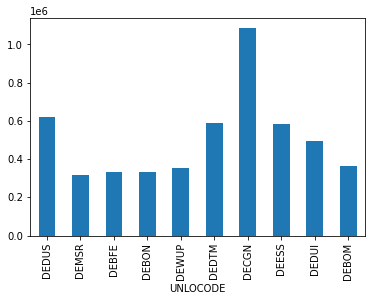

In [97]:
# we can plot the values of single columns. The row indices will be used on the x-axis
nrw_cities['inhabitants'].plot(kind='bar')

<AxesSubplot:title={'center':'Number of People vs. Area for Cities in NRW'}, xlabel='Area in km²', ylabel='Number of Inhabitants'>

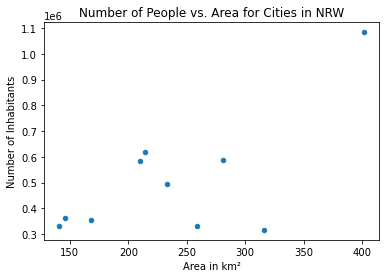

In [98]:
# Alternatively, we can plot two columns against each other
nrw_cities.plot(
    x='area',  # column name from which to take x-coordinate
    y='inhabitants',  # column name from which to take the y-coordinate
    kind='scatter',  # tell pandas to do a scatter plot
    title='Number of People vs. Area for Cities in NRW',  # title
    xlabel='Area in km²',  # axis label for x-axis of the chart
    ylabel='Number of Inhabitants'  # axis label for y-axis of the chart
)

## Storing data
Very similar to loading data, we can store dataframes in a variety of formats (c.f. [list of IO Formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io)).

In [99]:
nrw_cities.to_csv('expanded_city_data.csv', sep=';')  # by default, index labels are stored as well